# Lab 4. Probabilistic Inference
# Task 4.3 Monty Hall Problem Using Bayesian Network
## Problem Descriptions
Rules of Game:--
1. The host must always open a door that was not picked by the contestant.
2. The host must always open a door to reveal a goat and never the car.
3. The host must always offer the chance to switch between the originally chosen
door and the remaining closed door.
## Implementation and Results

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00


In [ ]:
# Defining the network structure
model = BayesianModel([('Contestant', 'Host'), ('Prize', 'Host')])

# Defining the CPDs:
cpd_c = TabularCPD('Contestant', 3, [[1/3], [1/3], [1/3]])
cpd_p = TabularCPD('Prize', 3, [[1/3], [1/3], [1/3]])
cpd_h = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                               [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                               [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Contestant', 'Prize'], evidence_card=[3, 3])

# cpd_c = TabularCPD('Contestant', 4, [[0.25], [0.25], [0.25], [0.25]])
# cpd_p = TabularCPD('Prize', 4, [[0.25], [0.25], [0.25], [0.25]])
# cpd_h = TabularCPD('Host', 4, [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3], 
#                                [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3], 
#                                [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3], 
#                                [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]],
#                   evidence=['Contestant', 'Prize'], evidence_card=[4, 4])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)


/usr/local/lib/python3.8/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
model = BayesianModel([('Contestant', 'Host'), ('Prize', 'Host')])


cpd_c = TabularCPD('Contestant', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_p = TabularCPD('Prize', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_h = TabularCPD('Host', 4, [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3], 
                               [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3], 
                                [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3], 
                                [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]],
                   evidence=['Contestant', 'Prize'], evidence_card=[4, 4])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

In [ ]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(variables=['Prize'], evidence={'Contestant': 0, 'Host': 2}, show_progress=False, joint=False)
print(posterior['Prize'])

+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.3333 |
+----------+--------------+
| Prize(1) |       0.6667 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+


/usr/local/lib/python3.8/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


# adding extra door

In [ ]:
# Adding extra door
cpd_c = TabularCPD('Contestant', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_p = TabularCPD('Prize', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_h = TabularCPD('Host', 4, [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3], 
                                [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3], 
                                [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3], 
                                [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]],
                   evidence=['Contestant', 'Prize'], evidence_card=[4, 4])


model.add_cpds(cpd_c, cpd_p, cpd_h)
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(variables=['Prize'], evidence={'Contestant': 0, 'Host': 2}, show_progress=False, joint=False)
print(posterior['Prize'])

+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.2500 |
+----------+--------------+
| Prize(1) |       0.3750 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+
| Prize(3) |       0.3750 |
+----------+--------------+


## Discussions

conditional probability table for the problem is:--
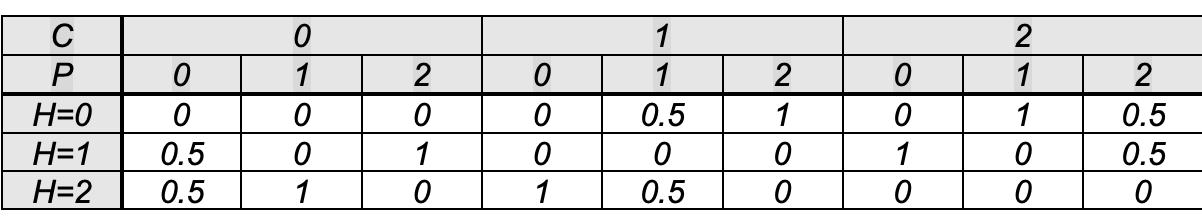


* clearly, if person stick to its origianl choice, the probability of winning is 0.33
* if user changes the door probability of winning is 0.6

* so, changing is door makes sense.

-------------------------------------------------------------------

# 4 doors

once we introduce 4 doors, and follow the same rule, below are the observations:--

* if user stick to original door, probability of winning is 0.25
* if user choases other door, probability of winning is 0.37
* in this case also, changing the initial choice makes sense, as it increases the probability of wining.